In [2]:
import pandas as pd

### Importing Ordes Data

In [3]:
orders = pd.read_csv('./src/Ecommerce_Orders.csv', sep=';')

In [4]:
orders.shape

(2237447, 19)

### Importing Payments Data

In [5]:
payments = pd.read_csv('./src/Ecommerce_Orders_Payment_States.csv', sep=';')
orders.shape

(2237447, 19)

### Importing Status Data

In [6]:
d = {'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'NAME': ['CANCELLED', 'CLOSED', 'PAID_FULL', 'CONTRACT_TERMINATION', 'INKASSO_CLOSED', 'PAID_OVER', 'INKASSO_PENDING','DUNNING_5','DUNNING_4', 'DUNNING_3', 'DUNNING_2', 'DUNNING_1', 'REMINDER_2', 'REMINDER_1', 'TRANSACTION_CREDIT_COLLECTION_IN_PROGRESS', 'CREATED']}
payment_status = pd.DataFrame(data=d)

### Merging Data

In [7]:
# merge data
order_payments = orders.merge(payments, 'inner', 'ORDER_ID')

In [8]:
order_payments.head()

,ORDER_ID,ORDER_DATE,CUSTOMER_ID,SHOP,CART_VALUE,NR_ITEMS,NR_ITEMS_UNIQUE,GENDER,AGE,STREET,...,CITY,STREET_ID,KNOWN_STREET,KNOWN_HOUSE,PHONE_TYPE,PHONE_PROVIDER,PHONE_QUALITY,MAIL_DOMAIN,PAYMENT_INFO,PAYMENT_DATE
0,9890976,2013-11-01,3047181,Food,10.65,3.0,3.0,m,23.0,Repsoldstr.,...,Hamburg,2.000000e+11,X,X,mobile,Telefonica,good,gmx.de,INKASSO_CLOSED,2018-06-19
1,9970836,2013-11-04,3245247,Shoes,69.88,2.0,2.0,f,36.0,Winkelmannshof,...,Gelsenkirchen,5.513000e+11,X,X,mobile,Telefonica,good,web.de,INKASSO_CLOSED,2018-06-19
2,10001535,2013-11-05,3251911,Furniture,43.00,1.0,1.0,u,39.0,Bahnhofstr.,...,Bad Orb,6.435001e+11,X,X,landline,NaN,NaN,t-online.de,INKASSO_CLOSED,2018-06-19
3,10011168,2013-11-05,3254519,DIY Superstore & Tools,378.39,6.0,6.0,m,24.0,Alte Bahnhofstr.,...,Bad Liebenstein,1.606310e+12,X,X,mobile,Telekom,good,googlemail.com,INKASSO_CLOSED,2018-06-19
4,10014162,2013-11-05,3255540,Food,8.25,2.0,2.0,m,21.0,Am Hörsterfriedhof,...,"Münster, Westf",5.515000e+11,X,X,mobile,Telefonica,good,hotmail.com,INKASSO_CLOSED,2018-06-19


### Out of range Data

In [9]:
### DROPPING ITEMS WITH CATEGORIES NOT NEEDED
order_payments.drop(order_payments.PAYMENT_INFO.loc[lambda x : (x == 'DEARM_PENDING') | (x == 'DIRECT_DEBIT_PENDING')].index, inplace=True) 

In [10]:
## DROPPING NR_ITEMS with value of 0
order_payments.drop(order_payments.loc[order_payments['NR_ITEMS'] == 0].index, inplace=True) 

In [11]:
order_payments.count()

ORDER_ID           5452391
ORDER_DATE         5452391
CUSTOMER_ID        5452391
SHOP               5452391
CART_VALUE         5452385
NR_ITEMS           5439812
NR_ITEMS_UNIQUE    5439812
GENDER             5452391
AGE                4976215
STREET             5452377
ZIP                5452391
CITY               5452391
STREET_ID          5431045
KNOWN_STREET       5431045
KNOWN_HOUSE        5274414
PHONE_TYPE         3161573
PHONE_PROVIDER     1173190
PHONE_QUALITY      1173190
MAIL_DOMAIN        4545840
PAYMENT_INFO       5452391
PAYMENT_DATE       5451262
dtype: int64

In [12]:
## IMPUTING DATA FOR NR_ITEMS MINOR THAN 0

In [13]:
order_payments['NR_ITEMS'].loc[order_payments['NR_ITEMS'] < 0] * -1


1966269    1.0
1966270    1.0
1981366    1.0
1981367    1.0
1981368    1.0
          ... 
1999822    3.0
2000201    4.0
2000202    4.0
2000203    4.0
2000204    4.0
Name: NR_ITEMS, Length: 135, dtype: float64

In [14]:
order_payments['NR_ITEMS'] = order_payments['NR_ITEMS'].apply(lambda x: x * -1 if x < 0 else x)

In [15]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5452391 entries, 0 to 5483738
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ORDER_ID         int64  
 1   ORDER_DATE       object 
 2   CUSTOMER_ID      int64  
 3   SHOP             object 
 4   CART_VALUE       float64
 5   NR_ITEMS         float64
 6   NR_ITEMS_UNIQUE  float64
 7   GENDER           object 
 8   AGE              float64
 9   STREET           object 
 10  ZIP              int64  
 11  CITY             object 
 12  STREET_ID        float64
 13  KNOWN_STREET     object 
 14  KNOWN_HOUSE      object 
 15  PHONE_TYPE       object 
 16  PHONE_PROVIDER   object 
 17  PHONE_QUALITY    object 
 18  MAIL_DOMAIN      object 
 19  PAYMENT_INFO     object 
 20  PAYMENT_DATE     object 
dtypes: float64(5), int64(3), object(13)
memory usage: 915.2+ MB


In [16]:
order_payments.GENDER.unique()

array(['m', 'f', 'u'], dtype=object)

In [17]:
order_payments.PHONE_TYPE.unique()

array(['mobile', 'landline', nan], dtype=object)

In [18]:
order_payments.PHONE_TYPE.isnull().count()

5452391

In [19]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5452391 entries, 0 to 5483738
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ORDER_ID         int64  
 1   ORDER_DATE       object 
 2   CUSTOMER_ID      int64  
 3   SHOP             object 
 4   CART_VALUE       float64
 5   NR_ITEMS         float64
 6   NR_ITEMS_UNIQUE  float64
 7   GENDER           object 
 8   AGE              float64
 9   STREET           object 
 10  ZIP              int64  
 11  CITY             object 
 12  STREET_ID        float64
 13  KNOWN_STREET     object 
 14  KNOWN_HOUSE      object 
 15  PHONE_TYPE       object 
 16  PHONE_PROVIDER   object 
 17  PHONE_QUALITY    object 
 18  MAIL_DOMAIN      object 
 19  PAYMENT_INFO     object 
 20  PAYMENT_DATE     object 
dtypes: float64(5), int64(3), object(13)
memory usage: 915.2+ MB


<AxesSubplot:>

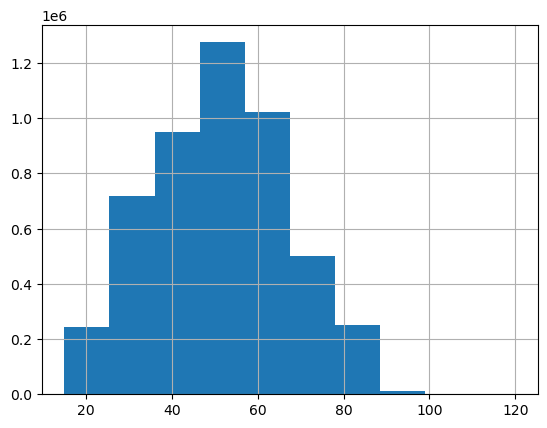

In [20]:
#Changing age to Integer
order_payments.AGE.hist()

In [21]:
order_payments.PAYMENT_DATE = pd.to_datetime(order_payments.PAYMENT_DATE)

In [22]:
order_payments.PAYMENT_DATE

0         2018-06-19
1         2018-06-19
2         2018-06-19
3         2018-06-19
4         2018-06-19
             ...    
5483734   2021-03-22
5483735   2021-03-22
5483736   2021-03-22
5483737   2021-03-22
5483738   2021-03-22
Name: PAYMENT_DATE, Length: 5452391, dtype: datetime64[ns]

### Changing Objects to categorical types


In [23]:
## Changing Object types to categorical types
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5452391 entries, 0 to 5483738
Data columns (total 21 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ORDER_ID         int64         
 1   ORDER_DATE       object        
 2   CUSTOMER_ID      int64         
 3   SHOP             object        
 4   CART_VALUE       float64       
 5   NR_ITEMS         float64       
 6   NR_ITEMS_UNIQUE  float64       
 7   GENDER           object        
 8   AGE              float64       
 9   STREET           object        
 10  ZIP              int64         
 11  CITY             object        
 12  STREET_ID        float64       
 13  KNOWN_STREET     object        
 14  KNOWN_HOUSE      object        
 15  PHONE_TYPE       object        
 16  PHONE_PROVIDER   object        
 17  PHONE_QUALITY    object        
 18  MAIL_DOMAIN      object        
 19  PAYMENT_INFO     object        
 20  PAYMENT_DATE     datetime64[ns]
dtypes: datetime64[ns](1), float64(5

In [24]:
order_payments['GENDER'] = order_payments['GENDER'].astype('category')
assert order_payments['GENDER'].dtype == 'category'

In [25]:
order_payments['PAYMENT_INFO'] = order_payments['PAYMENT_INFO'].astype('category')
assert order_payments['PAYMENT_INFO'].dtype == 'category'

In [26]:
order_payments['PHONE_TYPE'] = order_payments['PHONE_TYPE'].astype('category')
assert order_payments['PHONE_TYPE'].dtype == 'category'

In [40]:
order_payments['SHOP'] = order_payments['SHOP'].astype('category')
assert order_payments['SHOP'].dtype == 'category'

In [ ]:
order_payments['PHONE_QUALITY'] = order_payments['PHONE_QUALITY'].astype('category')
assert order_payments['PHONE_QUALITY'].dtype == 'category'

In [70]:
order_payments['PHONE_PROVIDER'] = order_payments['PHONE_PROVIDER'].astype('category')
assert order_payments['PHONE_PROVIDER'].dtype == 'category'

True

In [27]:
order_payments['PAYMENT_INFO'].unique()

['INKASSO_CLOSED', 'PAID_OVER', 'PAID_FULL', 'CLOSED', 'INKASSO_PENDING', ..., 'REMINDER_1', 'DUNNING_1', 'REMINDER_2', 'DUNNING_4', 'DUNNING_5']
Length: 16
Categories (16, object): ['INKASSO_CLOSED', 'PAID_OVER', 'PAID_FULL', 'CLOSED', ..., 'DUNNING_1', 'REMINDER_2', 'DUNNING_4', 'DUNNING_5']

In [28]:
### Dropping Categories not needed
order_payments['PAYMENT_INFO'][order_payments['PAYMENT_INFO'] == 'DIRECT_DEBIT_PENDING'].count()
order_payments['PAYMENT_INFO'][order_payments['PAYMENT_INFO'] == 'DEARM_PENDING'].count()

0

### Changing Dates to DateTime types

In [29]:
order_payments.PAYMENT_DATE = pd.to_datetime(order_payments.PAYMENT_DATE)

### Checking for duplicates

In [30]:
duplicates = order_payments.duplicated(subset=['ORDER_ID', 'CUSTOMER_ID', 'PAYMENT_DATE'], keep=False)


In [31]:
duplicates.loc[lambda x: x == True]

9089       True
9090       True
11238      True
11239      True
16879      True
           ... 
5479226    True
5480018    True
5480019    True
5480524    True
5480525    True
Length: 10902, dtype: bool

In [32]:
order_payments.loc[lambda x: x.ORDER_ID ==82760057 ]

,ORDER_ID,ORDER_DATE,CUSTOMER_ID,SHOP,CART_VALUE,NR_ITEMS,NR_ITEMS_UNIQUE,GENDER,AGE,STREET,...,CITY,STREET_ID,KNOWN_STREET,KNOWN_HOUSE,PHONE_TYPE,PHONE_PROVIDER,PHONE_QUALITY,MAIL_DOMAIN,PAYMENT_INFO,PAYMENT_DATE
11238,82760057,2016-11-21,2976761,Media,83.26,5.0,5.0,f,57.0,Masche,...,Haldensleben,1.508327e+12,X,X,landline,NaN,NaN,gmx.de,PAID_FULL,2016-12-07
11239,82760057,2016-11-21,2976761,Media,83.26,5.0,5.0,f,57.0,Masche,...,Haldensleben,1.508327e+12,X,X,landline,NaN,NaN,gmx.de,PAID_OVER,2016-12-07


### Categorical Data

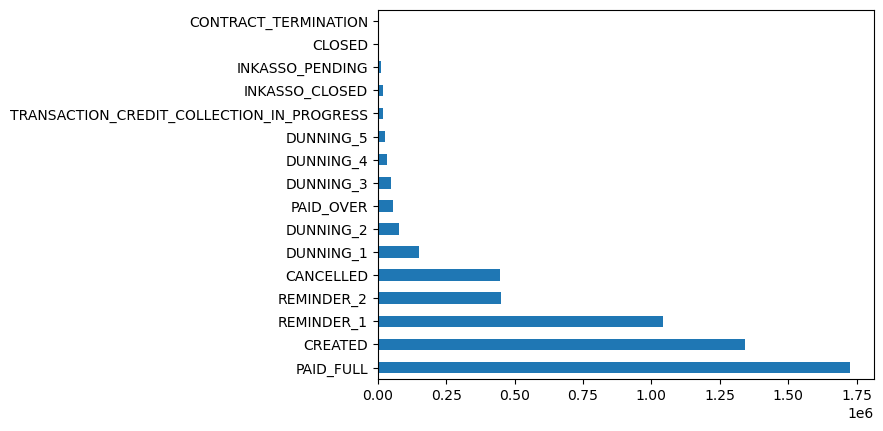

In [33]:
order_payments['PAYMENT_INFO'].value_counts().plot.barh();

In [ ]:
?plot

<AxesSubplot:>

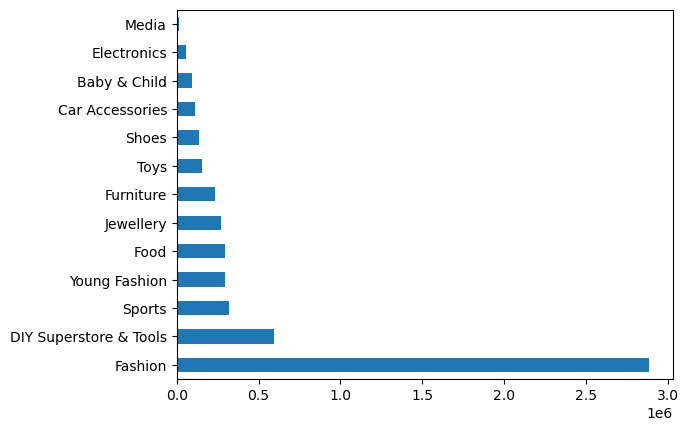

In [45]:
order_payments['SHOP'].value_counts().plot.barh()